In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import pickle

# Import Model related packages
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Model evaluation related packages
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

# for one hot encoding of labels
from sklearn.preprocessing import OneHotEncoder

# Plot related packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Presenting the results
from prettytable import PrettyTable

Using TensorFlow backend.


# HumanActivityRecognition

<br>


This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

## How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 

> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

### Feature names

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 

2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
> In our dataset, each datapoint represents a window with different readings 
3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable'
`
	+ gravityMean
	+ tBodyAccMean
	+ tBodyAccJerkMean
	+ tBodyGyroMean
	+ tBodyGyroJerkMean


###  Y_Labels(Encoded)
+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__
    
## Train and test data were saperated
 - The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___
 
## Data

* All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
     - Feature names are present in 'UCI_HAR_dataset/features.txt'
     - ___Train Data___
         - 'UCI_HAR_dataset/train/X_train.txt'
         - 'UCI_HAR_dataset/train/subject_train.txt'
         - 'UCI_HAR_dataset/train/y_train.txt'
     - ___Test Data___
         - 'UCI_HAR_dataset/test/X_test.txt'
         - 'UCI_HAR_dataset/test/subject_test.txt'
         - 'UCI_HAR_dataset/test/y_test.txt'
         

## Data Size :
> 27 MB


# Quick overview of the dataset :

* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

## Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.


# Configs

In [2]:
# base directory for dataset
data_base_dir = '/home/nisheel-s/RUN_AMT/DS/CS11_HUMAN_ACTIVITY_RECOGNITION/'

# classification related configs
num_clasess = 6
class_names_list = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 
                    'STANDING', 'SITTING', 'LAYING']
class_labels_list = list(range(1, num_clasess + 1))

# dataset size related configs
dataset_size = -1 # set -1  for using full size

# UTIL functions

In [3]:
def get_confusion_matrix(actual_list, predicted_list, title_suffix=str(), plot_fig=True):
    """
    This function plots the confusion matrix given ground truth and predicted
    """
    
    conf_matrix = confusion_matrix(actual_list, predicted_list, 
                                   labels=list(range(0, num_clasess)))
    
    conf_df = pd.DataFrame(conf_matrix, columns=class_names_list)
    conf_df.index = class_names_list
    
    # plot confusion matrix
    if plot_fig:
        plt.figure(figsize=(9,6))
        sns.heatmap(conf_df, annot=True, annot_kws={'size': 8}, fmt='g', cmap='YlGnBu',
                       cbar_kws={'label': 'prediction_count', 'format':'%d'})
        plt.yticks(rotation=0)
        plt.xticks(rotation=90)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix -' + title_suffix)
        plt.show()
    
    return conf_df

In [4]:
def get_precision_recall_matrix(conf_matrix, title_suffix=str(), plot_fig=True):
    
    # compute precision matrix
    precision_matrix = conf_matrix.div(conf_matrix.sum(axis=0), axis=1) * 100.0
    
    # compute recall matrix
    recall_matrix = conf_matrix.div(conf_matrix.sum(axis=1), axis=0) * 100.0
    
    # plot both the matrices
    if plot_fig:
        # plot precision matrix
        plt.figure(figsize=(9,6))
        sns.heatmap(precision_matrix, annot=True, annot_kws={'size': 8}, 
                    fmt='.4f', cmap='YlGnBu',
                    cbar_kws={'label': 'percentage', 'format':'%.2f'})
        plt.yticks(rotation=0)
        plt.xticks(rotation=90)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Precision Matrix -' + title_suffix)
        plt.show()

        # plot recall matrix
        plt.figure(figsize=(9,6))
        sns.heatmap(recall_matrix, annot=True, annot_kws={'size': 8},
                    fmt='.4f', cmap='YlGnBu',
                    cbar_kws={'label': 'percentage', 'format':'%.2f'})
        plt.yticks(rotation=0)
        plt.xticks(rotation=90)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Recall Matrix -' + title_suffix)
        plt.show()
    
    # return as a tuple
    return (precision_matrix, recall_matrix,)

In [5]:
def get_classification_report(actual, predicted, title_suffix=str(), plot_fig=True):
    
    # compute performance df
    eval_matrix = precision_recall_fscore_support(actual, predicted, 
                                    labels=list(range(0, num_clasess)))
    
    eval_df = pd.DataFrame(list(eval_matrix), columns=list(range(0, num_clasess)))
    eval_df.index = ['Precision', 'Recall', 'Fscore', 'Support']
    eval_df.columns = class_names_list
    
    
    # normalize the performace df
    eval_df_normed = eval_df * 100.0
    eval_df_normed.loc['Support', class_names_list] /= eval_df_normed.loc['Support', 
                                                       class_names_list].sum()
    eval_df_normed.iloc[3:4, :] *= 100.0
    
    # plot the classification report
    if plot_fig:
        plt.figure(figsize=(9,6))
        sns.heatmap(eval_df_normed, annot=True, annot_kws={'size': 8}, 
                    fmt='.4f', cmap='YlGnBu',
                    cbar_kws={'label': 'Percentage', 'format':'%.2f'})
        plt.yticks(rotation=0)
        plt.xticks(rotation=90)

        plt.xlabel('Classes')
        plt.ylabel('Metrics')
        plt.title('Classification Report on ' + title_suffix + ' Data')
        plt.show()
    
    return eval_df_normed

In [6]:
def plot_loss_curve(hist_obj):
    """
    This function plots the loss curve
    """
    
    # get train , validation loss information from object
    train_loss_list = list(hist_obj['loss'])
    validation_loss_list = list(hist_obj['val_loss'])
    
    # get x-label list
    epcoh_list = range(1, len(train_loss_list) + 1 )
    
    # plot the performace
    # plot both train, validation curve
    plt.plot(epcoh_list, train_loss_list, 
             label='Train Loss', color='r')
    plt.plot(epcoh_list, validation_loss_list, 
             label='Validation Loss', color='b')
    plt.xlabel('Training Epoch')
    plt.ylabel('Multiclass Log Loss')
    plt.title('Training Loss Vs Validation Loss')
    plt.legend()
    plt.show()

In [7]:
def plot_accuracy_curve(hist_obj):
    """
    This is a helper function for plotting accuracy
    """
    
    # extract train, validation accuracy metrics
    train_acc_list = list(hist_obj['acc'])
    val_acc_list = list(hist_obj['val_acc'])
    
    # get x-label list
    epcoh_list = range(1, len(train_acc_list) + 1 )
    
    
    # plot both train, validation curve
    plt.plot(epcoh_list, train_acc_list, label='Train Accuracy', color='r')
    plt.plot(epcoh_list, val_acc_list, label='Validation Accuracy', color='b')
    plt.xlabel('Training Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy Vs Validation Accuracy')
    plt.legend()
    plt.show()

# Data

In [8]:
# declare one hot encoder for label
one_hot_encoder = OneHotEncoder(sparse=False, categories='auto') 
one_hot_encoder.fit(np.array(class_labels_list).reshape(num_clasess, 1))

OneHotEncoder(categorical_features=None, categories='auto',
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=False)

In [9]:
# Utility function to load the features
def load_features(data_base_dir, dataset_type):
    
    # declare all the signals in a list
    SIGNALS = [
    'body_acc_x',
    'body_acc_y',
    'body_acc_z',
    'body_gyro_x',
    'body_gyro_y',
    'body_gyro_z',
    'total_acc_x',
    'total_acc_y',
    'total_acc_z' ]
    
    # declare a list for holding the entire data frame
    signals_data = list()

    # do for all signals in the list
    for signal in SIGNALS:
        
        # set the file path
        file_path = os.path.join(data_base_dir, 
                                 f'{dataset_type}/Inertial Signals/{signal}_{dataset_type}.txt')
        # read the file
        tdf = pd.read_csv(file_path, delim_whitespace=True, header=None)
        # update the list
        signals_data.append(tdf.values)

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    signals_data =  np.transpose(signals_data, (1, 2, 0))
    
    
    return signals_data

In [10]:
def load_labels(data_base_dir, dataset_type):
    
    # set the file path
    file_path = os.path.join(data_base_dir, f'{dataset_type}/y_{dataset_type}.txt')
    # read the file
    tdf = pd.read_csv(file_path, delim_whitespace=True, header=None, squeeze=True)
    
    print('Distribution of labels :\n', tdf.value_counts())
    
    # get labels in one-hot encoded representation
    labels = one_hot_encoder.transform(tdf.values.reshape(len(tdf), 1)).astype(int)
                                       
    return labels 

## Raw data signals Information

%%HTML
<ul>
<li> Signals are from Accelerometer and Gyroscope </li>
<li> The signals are in x,y,z directions </li>
<li> Triaxial acceleration from the accelerometer is total acceleration. </li>
<li> Sensor signals are filtered to have only body acceleration </li>
<li> excluding the acceleration due to gravity</li>
</ul>

In [11]:
# Load the features
X_train = load_features(data_base_dir, 'train')
X_test = load_features(data_base_dir, 'test')
# Load the labels
y_train = load_labels(data_base_dir, 'train')
y_test = load_labels(data_base_dir, 'test')

if dataset_size > 0:
    X_train = X_train[0:dataset_size]
    X_test = X_test[0:dataset_size]
    y_train = y_train[0:dataset_size]
    y_test = y_test[0:dataset_size]

Distribution of labels :
 6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: 0, dtype: int64
Distribution of labels :
 6    537
5    532
1    496
4    491
2    471
3    420
Name: 0, dtype: int64


In [12]:
print('Train features shape : ', X_train.shape)
print('Train labels shape : ', y_train.shape)
print('Test features shape : ', X_test.shape)
print('Test labels shape : ', y_test.shape)

Train features shape :  (7352, 128, 9)
Train labels shape :  (7352, 6)
Test features shape :  (2947, 128, 9)
Test labels shape :  (2947, 6)


# MODEL

In [13]:
def build_model_a(timesteps, input_dim, h_params):

    # Initiliazing the sequential model
    model = Sequential()
    
    # extract the hyper params
    n_hidden = h_params[0]
    dr_rate = h_params[1]
    
    # Configuring the parameters
    model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
    
    # Adding a dropout layer
    model.add(Dropout(dr_rate))
    
    # Adding a dense output layer with sigmoid activation
    model.add(Dense(num_clasess, activation='sigmoid'))
    
    print(model.summary())
    
    return model

In [14]:
def build_model_b(timesteps, input_dim, h_params):

    # Initiliazing the sequential model
    model = Sequential()
    
    # Extract Hyperparameters
    
    # 1 - extract the number of neuorons
    n_hidden_1 = h_params[0]
    n_hidden_2 = h_params[1]
    
    # 2 - extract dropout rates 
    dr_rate_1 = h_params[2]
    dr_rate_2 = h_params[3]
    
    # Configuring the parameters
    model.add(LSTM(n_hidden_1, input_shape=(timesteps, input_dim), 
                   return_sequences=True))
    model.add(Dropout(dr_rate_1))
    model.add(LSTM(n_hidden_2, return_sequences=False))
    
    # Adding a dropout layer
    model.add(Dropout(dr_rate_2))
    
    # Adding a dense output layer with sigmoid activation
    model.add(Dense(num_clasess, activation='sigmoid'))
    
    print(model.summary())
    
    return model

In [15]:
def train_model(model, model_name, X_train, y_train, num_epochs):

    # Compiling the model
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    
    
    # monitor the performace of model on  every epoch
    checkpoint = ModelCheckpoint('./model/' + model_name, monitor='val_loss', 
                                 verbose=0, save_best_only=True, mode='auto')
    
     # add early stopping
    early_stop =  EarlyStopping(monitor='val_loss', min_delta=0, 
                      patience=5, verbose=0, mode='auto')
    
    callbacks_list = [checkpoint, early_stop]


    # Train the model
    hist_obj = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, 
                         validation_data=(X_test, y_test),
                         callbacks=callbacks_list, verbose=0)
    hist_obj = hist_obj.history
    
    # write train history to a file
    hist_path = './results/' + model_name[0:-3] + '_train_history.pkl'
    pickle_out = open(hist_path, 'wb')
    pickle.dump(hist_obj, pickle_out)
    pickle_out.close()
    
    return hist_obj

In [16]:
def evaluate_model(model, model_name, X, y, title_suffix=str(), plot_fig=True):
    
    # load weights from the saved model
    model_path = './model/' + model_name
    model.load_weights(model_path)
    
    # Compile model (required to make predictions)
    model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])
    print('Restored best model weights from saved file', model_path)
    
    # evaluate model
    score = model.evaluate(X, y)
    
    # predict using model & get the labels
    predicted_labels = model.predict(X)
    predicted_labels_list = predicted_labels.argmax(axis=1)
    
    # format the actual list
    y_list = y.argmax(axis=1)
    

    # 1. Create confusion matrix
    conf_df = get_confusion_matrix(y_list, predicted_labels_list, 
                                   title_suffix, plot_fig)
    # 2. Precision, Recall matrix
    pre_matrix, rec_matrix = get_precision_recall_matrix(conf_df, 
                                                         title_suffix,
                                                         plot_fig)
    
    # 3. Evaluation metrics
    eval_df = get_classification_report(y_list, predicted_labels_list, 
                                        title_suffix, plot_fig)
    
    # convert accuracy to percentage
    score[1] *= 100.0 
    
    # extract individual fields
    return score

# Run Models

In [17]:
# Initializing parameters
num_epochs = 30
batch_size = 16

timesteps = len(X_train[0])
input_dim = len(X_train[0][0])

print('Number of clasess :', num_clasess)
print('Number of timesteps :', timesteps)
print('Input data dimenion :', input_dim)

Number of clasess : 6
Number of timesteps : 128
Input data dimenion : 9


In [18]:
# Importing tensorflow
np.random.seed(42)
tf.set_random_seed(42)

In [19]:
# Configuring a session
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

In [20]:
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

## a) Single-Layered Architecture

### Architecture 1

In [21]:
# Build the Model
h_params_a1 = (32, 0.32,)
model_a1 = build_model_a(timesteps, input_dim, h_params_a1)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
# Train the Model
model_a1_name = 'Single_Layered_LSTM_1.h5'
hist_model_a1 = train_model(model_a1, model_a1_name, X_train, y_train, num_epochs)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


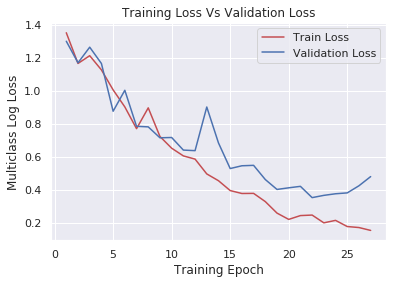

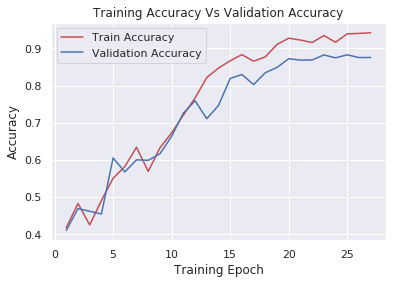

In [23]:
# plot loss, accuracy curves
plot_loss_curve(hist_model_a1)
plot_accuracy_curve(hist_model_a1)

In [24]:
# Evaluate the model on Test data
train_score_model_a1 = evaluate_model(model_a1, model_a1_name, X_train, y_train, 
                                     title_suffix='Train', plot_fig=False)
train_score_model_a1 = [round(item, 4) for item in train_score_model_a1]

Restored best model weights from saved file ./model/Single_Layered_LSTM_1.h5
7352/7352 [==============================] - 2s 304us/step


Restored best model weights from saved file ./model/Single_Layered_LSTM_1.h5
2947/2947 [==============================] - 1s 351us/step


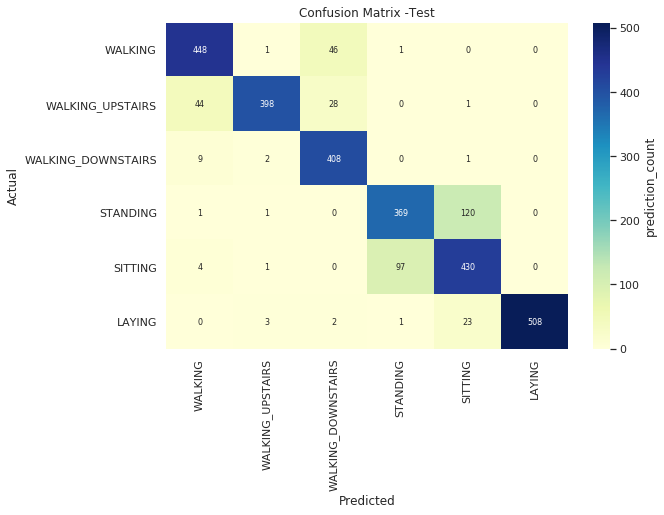

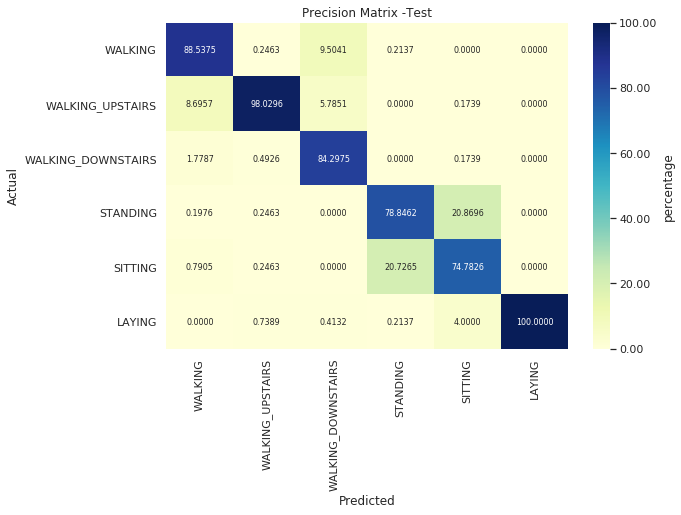

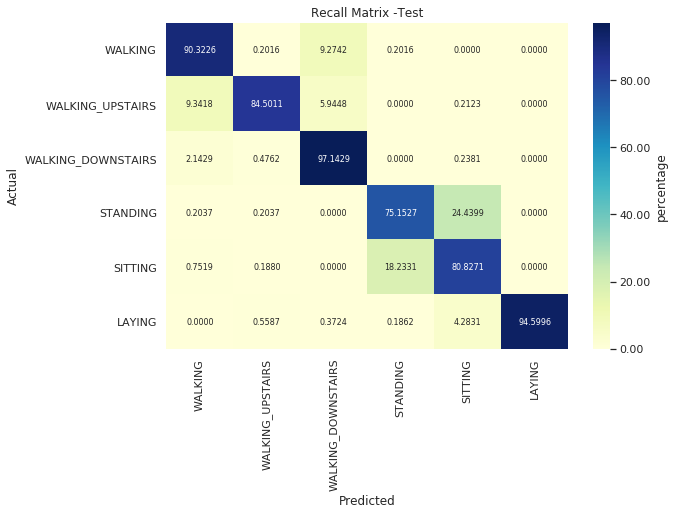

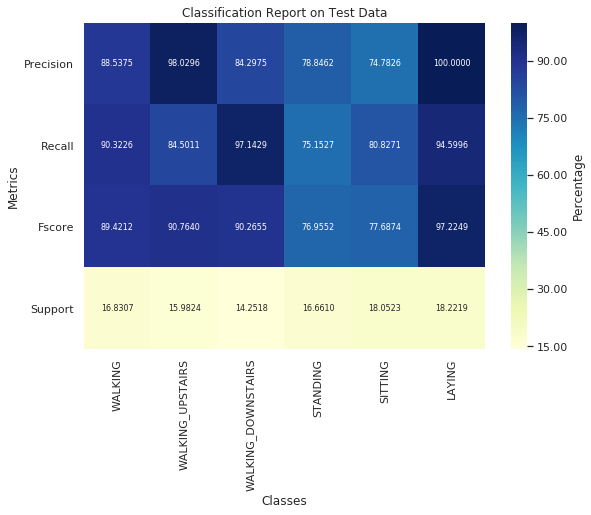

In [25]:
# Evaluate the model on Test data
test_score_model_a1 = evaluate_model(model_a1, model_a1_name, X_test, y_test, 
                                    title_suffix='Test', plot_fig=True)
test_score_model_a1 = [round(item, 4) for item in test_score_model_a1]

In [26]:
table_entry_model_a1 = ['1 Layered LSTM(1)', h_params_a1] + train_score_model_a1 + \
                      test_score_model_a1

### Architecture 2

In [27]:
# Build the Model
h_params_a2 = (48, 0.40,)
model_a2 = build_model_a(timesteps, input_dim, h_params_a2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 48)                11136     
_________________________________________________________________
dropout_2 (Dropout)          (None, 48)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 294       
Total params: 11,430
Trainable params: 11,430
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
# Train the Model
model_a2_name = 'Single_Layered_LSTM_2.h5'
hist_model_a2 = train_model(model_a2, model_a2_name, X_train, y_train, num_epochs)

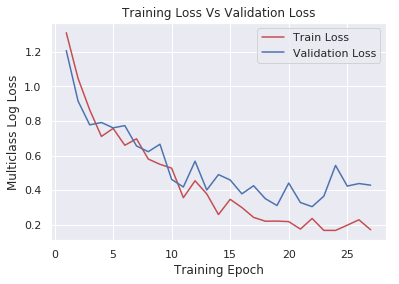

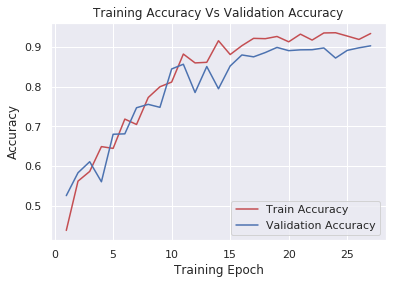

In [29]:
# plot loss, accuracy curves
plot_loss_curve(hist_model_a2)
plot_accuracy_curve(hist_model_a2)

In [30]:
# Evaluate the model on Test data
train_score_model_a2 = evaluate_model(model_a2, model_a2_name, X_train, y_train, 
                                     title_suffix='Train', plot_fig=False)
train_score_model_a2 = [round(item, 4) for item in train_score_model_a2]

Restored best model weights from saved file ./model/Single_Layered_LSTM_2.h5
7352/7352 [==============================] - 2s 293us/step


Restored best model weights from saved file ./model/Single_Layered_LSTM_2.h5
2947/2947 [==============================] - 1s 338us/step


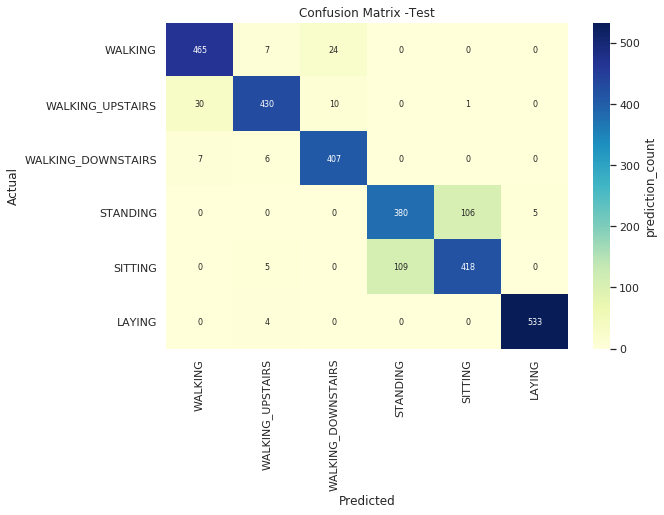

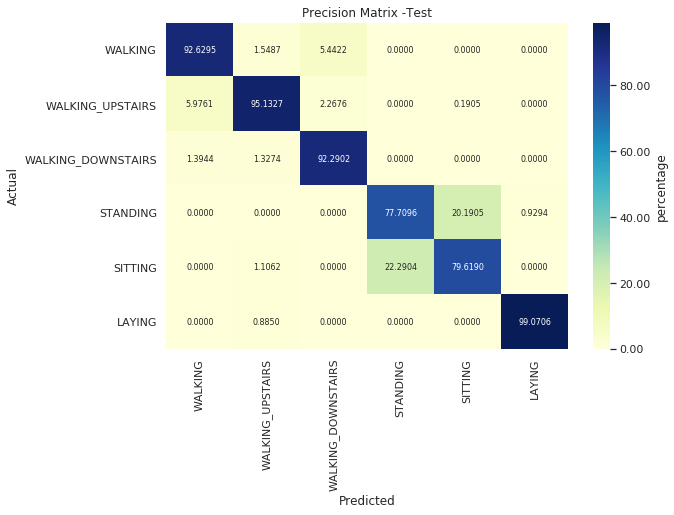

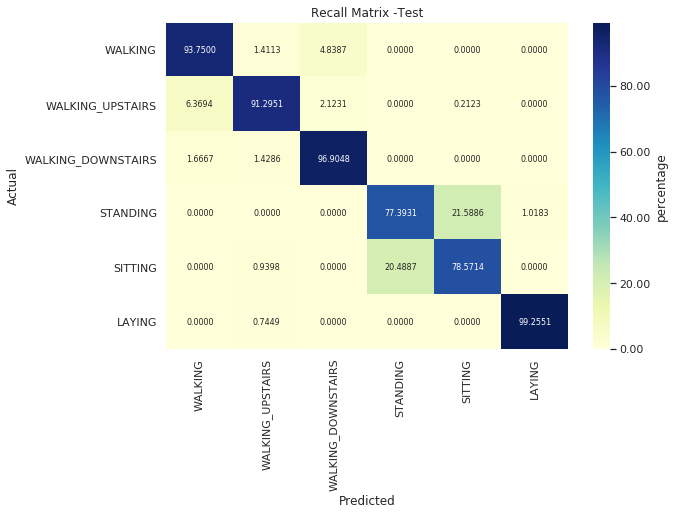

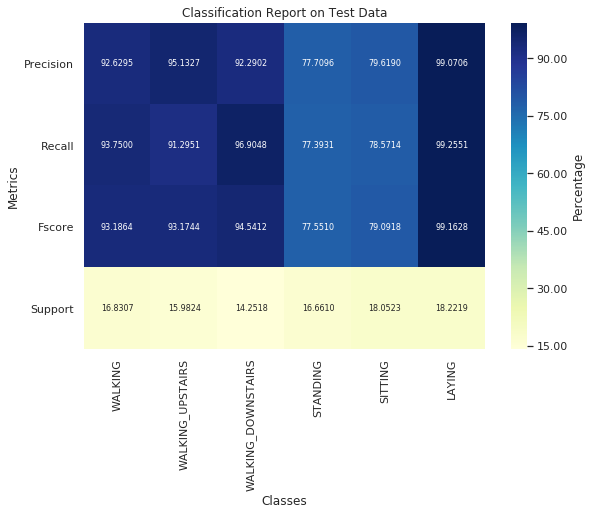

In [31]:
# Evaluate the model on Test data
test_score_model_a2 = evaluate_model(model_a2, model_a2_name, X_test, y_test, 
                                    title_suffix='Test', plot_fig=True)
test_score_model_a2 = [round(item, 4) for item in test_score_model_a2]

In [32]:
table_entry_model_a2 = ['1 Layered LSTM(2)', h_params_a2] + train_score_model_a2 + \
                      test_score_model_a2

## b) 2-Layered Architecture

### Architecture 1

In [33]:
h_params_b1 = (32, 18, 0.30, 0.45,)
model_b1 = build_model_b(timesteps, input_dim, h_params_b1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
dropout_3 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 18)                3672      
_________________________________________________________________
dropout_4 (Dropout)          (None, 18)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 114       
Total params: 9,162
Trainable params: 9,162
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
# Train the Model
model_b1_name = 'Two_Layered_LSTM_1.h5'
hist_model_b1 = train_model(model_b1, model_b1_name, X_train, y_train, num_epochs)

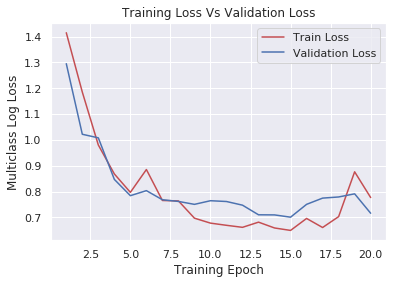

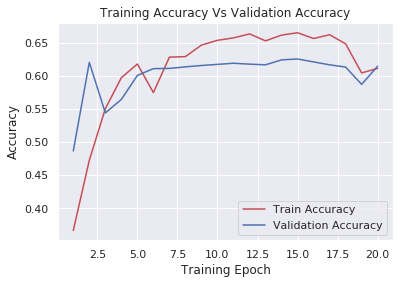

In [35]:
# plot loss, accuracy curves
plot_loss_curve(hist_model_b1)
plot_accuracy_curve(hist_model_b1)

In [36]:
# Evaluate the model on train data
train_score_model_b1 = evaluate_model(model_b1, model_b1_name, X_train, y_train, 
                                    title_suffix='Train', plot_fig=False)
train_score_model_b1 = [round(item, 4) for item in train_score_model_b1]

Restored best model weights from saved file ./model/Two_Layered_LSTM_1.h5
7352/7352 [==============================] - 4s 575us/step


/home/nisheel-s/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Restored best model weights from saved file ./model/Two_Layered_LSTM_1.h5
2947/2947 [==============================] - 2s 656us/step


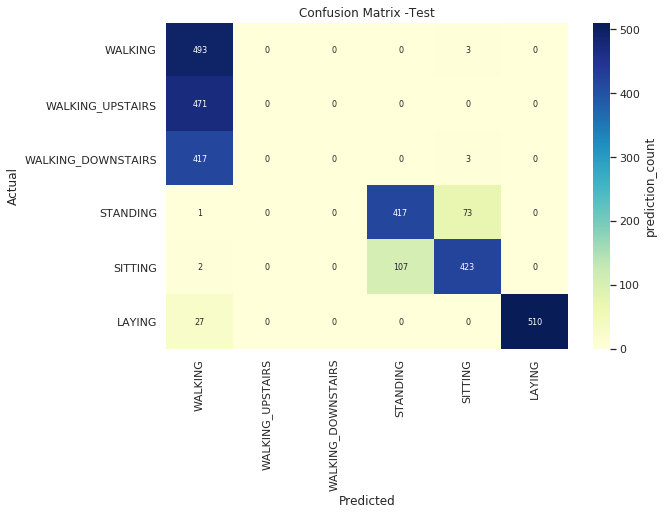

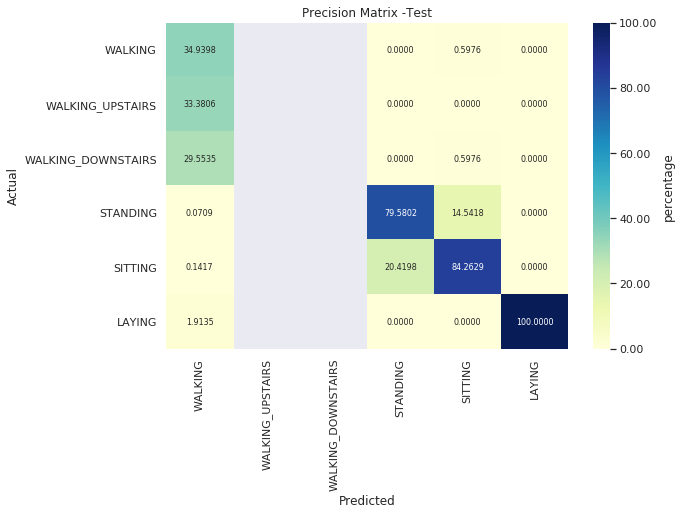

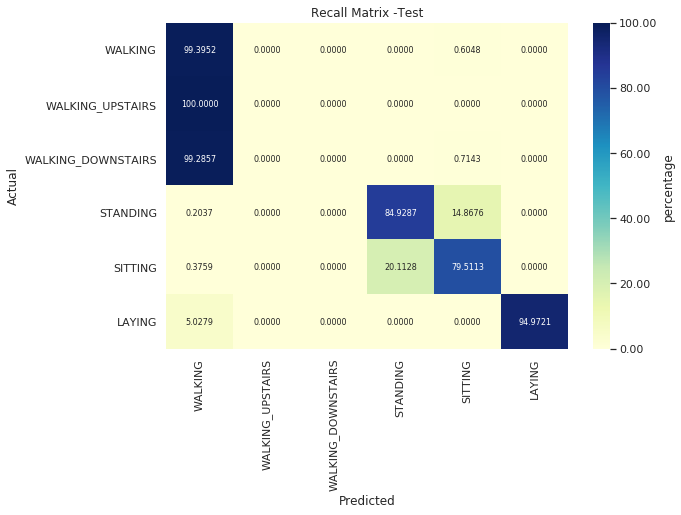

/home/nisheel-s/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


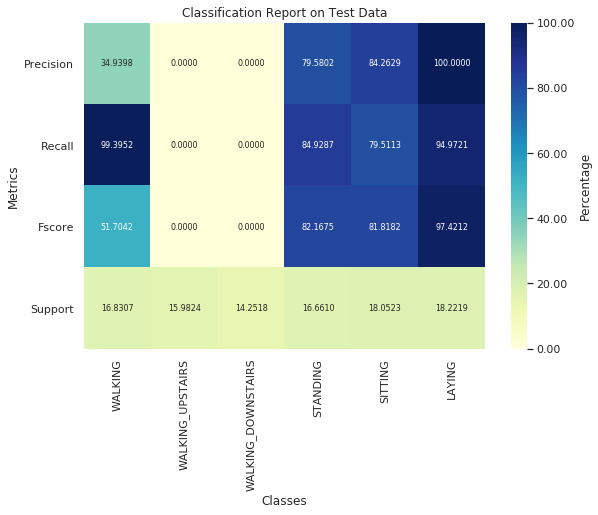

In [37]:
# Evaluate the model on test data
test_score_model_b1 = evaluate_model(model_b1, model_b1_name, X_test, y_test, 
                                   title_suffix='Test', plot_fig=True)
test_score_model_b1 = [round(item, 4) for item in test_score_model_b1]

In [38]:
table_entry_model_b1 = ['2 Layered LSTM(1)', h_params_b1] + train_score_model_b1 + \
                      test_score_model_b1

### Architecture 2

In [39]:
h_params_b2 = (44, 23, 0.32, 0.48,)
model_b2 = build_model_b(timesteps, input_dim, h_params_b2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 128, 44)           9504      
_________________________________________________________________
dropout_5 (Dropout)          (None, 128, 44)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 23)                6256      
_________________________________________________________________
dropout_6 (Dropout)          (None, 23)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 144       
Total params: 15,904
Trainable params: 15,904
Non-trainable params: 0
_________________________________________________________________
None


In [40]:
# Train the Model
model_b2_name = 'Two_Layered_LSTM_2.h5'
hist_model_b2 = train_model(model_b2, model_b2_name, X_train, y_train, num_epochs)

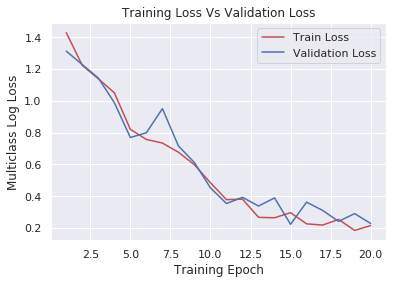

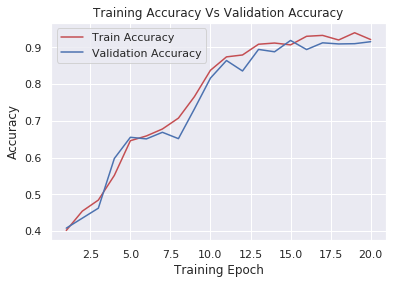

In [41]:
# plot loss, accuracy curves
plot_loss_curve(hist_model_b2)
plot_accuracy_curve(hist_model_b2)

In [42]:
# Evaluate the model on train data
train_score_model_b2 = evaluate_model(model_b2, model_b2_name, X_train, y_train, 
                                    title_suffix='Train', plot_fig=False)
train_score_model_b2 = [round(item, 4) for item in train_score_model_b2]

Restored best model weights from saved file ./model/Two_Layered_LSTM_2.h5
7352/7352 [==============================] - 5s 687us/step


Restored best model weights from saved file ./model/Two_Layered_LSTM_2.h5
2947/2947 [==============================] - 2s 786us/step


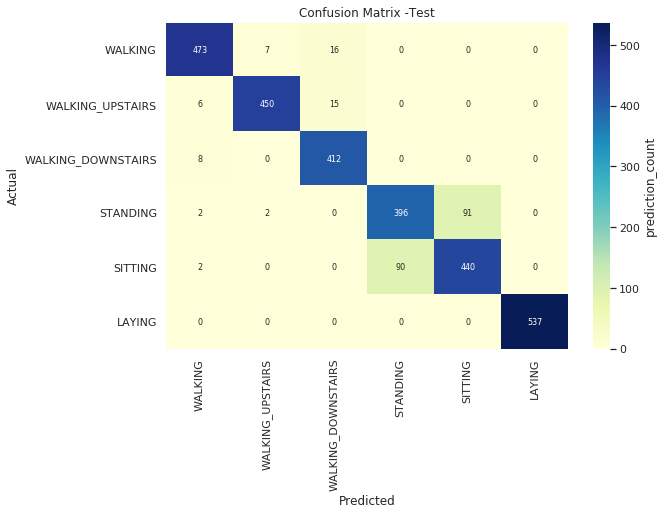

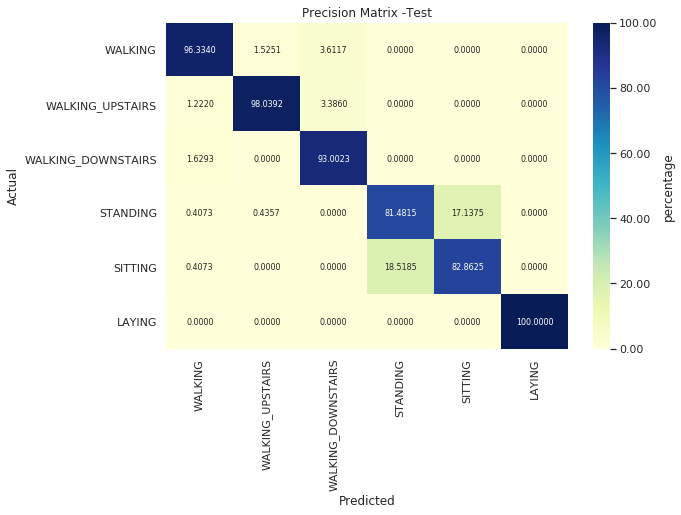

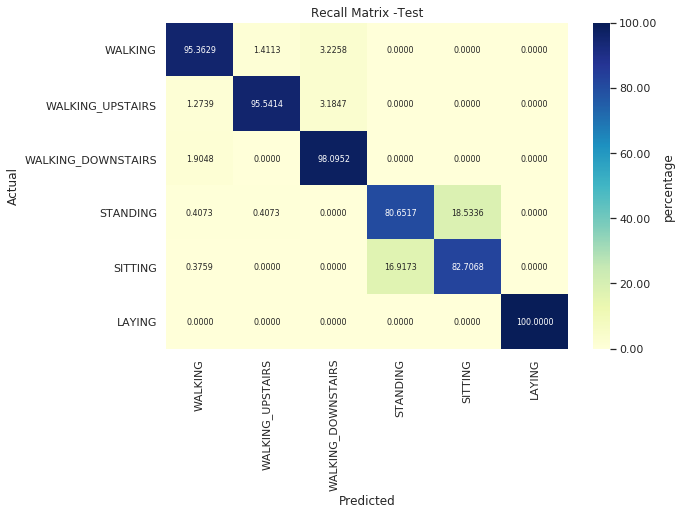

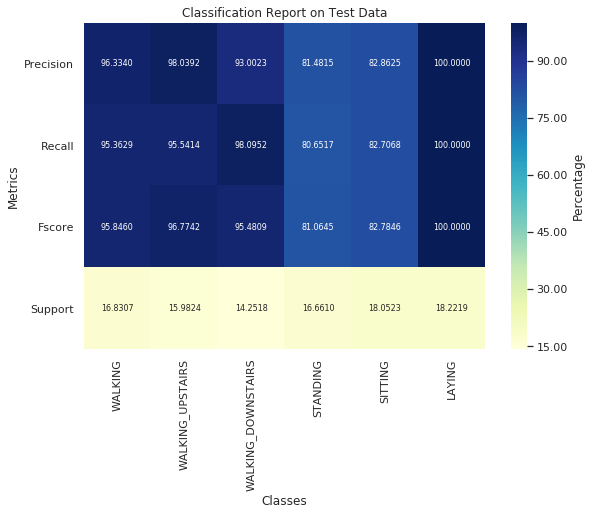

In [43]:
# Evaluate the model on test data
test_score_model_b2 = evaluate_model(model_b2, model_b2_name, X_test, y_test, 
                                   title_suffix='Test', plot_fig=True)
test_score_model_b2 = [round(item, 4) for item in test_score_model_b2]

In [44]:
table_entry_model_b2 = ['2-Layered LSTM(2)', h_params_b2] + train_score_model_b2 + \
                      test_score_model_b2

# Results

In [45]:
Pret_table = PrettyTable()
Pret_table.field_names = ['Model', """Hyperparam (#units,dropout)""", 
                          'Train Loss', 'Train Acc (%)', 'Test Loss', 
                          'Test Acc (%)']
Pret_table.title = 'HAR LSTM Model Performances'

Pret_table.add_row(table_entry_model_a1)
Pret_table.add_row(table_entry_model_a2)
Pret_table.add_row(table_entry_model_b1)
Pret_table.add_row(table_entry_model_b2)
print(Pret_table)

+-------------------+-----------------------------+------------+---------------+-----------+--------------+
|       Model       | Hyperparam (#units,dropout) | Train Loss | Train Acc (%) | Test Loss | Test Acc (%) |
+-------------------+-----------------------------+------------+---------------+-----------+--------------+
| 1 Layered LSTM(1) |          (32, 0.32)         |   0.1624   |    93.7432    |   0.3532  |   86.9019    |
| 1 Layered LSTM(2) |          (48, 0.4)          |   0.1592   |     94.056    |   0.3041  |   89.3451    |
| 2 Layered LSTM(1) |     (32, 18, 0.3, 0.45)     |   0.6048   |     67.519    |   0.7012  |   62.5382    |
| 2-Layered LSTM(2) |     (44, 23, 0.32, 0.48)    |   0.1456   |    94.9674    |   0.2236  |   91.8901    |
+-------------------+-----------------------------+------------+---------------+-----------+--------------+


# Procedure Summary

<ul>
<li> The dataset is re-formated to feed into LSTM model </li>
<li> The datset is pattioned based on the number of users , 21 users in train side, 9 in 
     test side (70:30) split</li>
<li> Two versions of single layered LSTM is architecure is desinged </li>
<li> Two versions of two layered LSTM is architecure is desinged </li>
<li> Train vs validation loss plot is made to ealuate performance </li>
</ul>

# Conclusion

<ul>
<li> 2-Layered LSTM architecture 2 performed well with 91.89 % accuracy </li>
<li> 2-Layered LSTM architecure performace is not good as tbe accuracy is 62% very less compared to other
     models </li>
<li> Single layered architectue 1 showed 7% deviation between train, test. It shows tendancy to overfit </li>
<li> Hyperparam of 2-layered architecture 2 can be tuned to improve the results further </li>
<li> All models get confused more in classiying between sitting & standing </li>
</ul>